In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix
from sklearn.metrics import precision_recall_curve
import pickle
import metrics
import Evaluation as eva

__filename__ = 'LR.model'

with open('.env') as f:
    _data_pth_ = f.readline().strip()
    _data_pth_ = os.path.expanduser(_data_pth_)

### load data

In [ ]:
data = pd.read_csv(f'{_data_pth_}/processed/train_transaction.csv', index_col=0)
y, X = data['isFraud'], data.drop(columns=['isFraud'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

### Regression

In [ ]:
_lr = LR(penalty='l1', solver='saga') # use LASSO to filter features 
model = _lr.fit(X_train, y_train)

## Export model

In [ ]:
# save the model to disk
pickle.dump(model, open(f'../models/{__filename__}', 'wb'))

## Evaluation

0.9722742448712408
0.9719620892964352
Test data
[[1807, 187608], [392, 5072]]
Misclassification error =  5464
SENS(recall)  =  0.2626835295827882
SPEC   =  0.9979148936170212
PPV(Precision)   =  0.8217371532514779
NPV   =  0.973676562175628
F1-SCORE =  0.3981053095395461


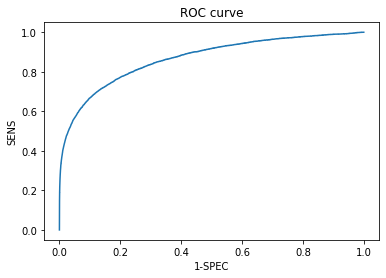

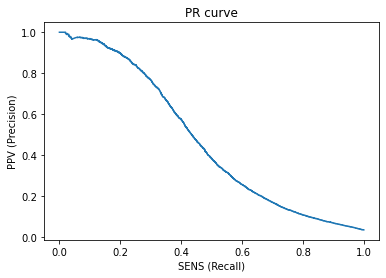

In [2]:
eva.evaluate("LR")

### dumb classifier test

In [ ]:
y, X = data['isFraud'], data.drop(columns=['isFraud'])
y[5:10] = 1
model = _lr.fit(X[:10], y[:10])
sc_dumb = model.score(X_test, y_test)
print(sc_dumb)